# Почему Логистическая регрессия - линейная модель

In [58]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression

# объем генерируемого набора данных
n = 200
# функция указывает правило дикриминации
dicr_fun = lambda x1, x2: x1 - x2 < 0.4

# Подготовительный этап

## Сренерируем входной набор данных
Массив дву-размерных точек, разделенный на две группы по некоторому линейному правилу

X1 = np.random.rand(n).reshape(n,1)
X2 = np.random.rand(n).reshape(n,1)
Y = dicr_fun(X1, X2).reshape(n,1)

В целом полученный массив меня устравивает, потому отложу его в файл

np.savetxt('2dim_data_for_logit.csv', np.concatenate([X1,X2,Y], axis = 1), delimiter=',')#.savetxt('2dim_data_for_logit.csv', sep = ',')


Загрузим полученный файл

In [62]:
arr = np.genfromtxt("2dim_data_for_logit.csv", delimiter=",")
X1, X2, Y = list(map(lambda x: x.reshape(n,1), arr.T))
Y = Y.astype('bool').reshape((n,))

## Диaграмма рассеяния с цветом распределяющим по классам

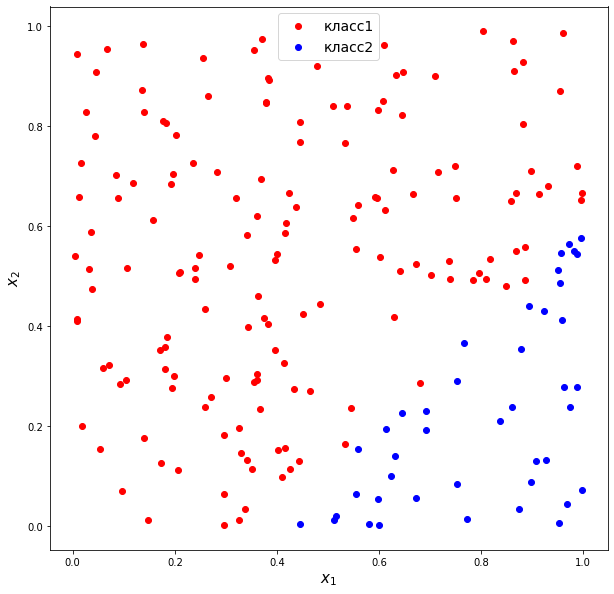

In [60]:
plt.figure(figsize = [10,10])

plt.scatter(X1[Y], X2[Y], color = 'red')
plt.scatter(X1[np.invert(Y)], X2[np.invert(Y)], color = 'blue')
plt.xlabel('$x_1$', fontsize = 15)
plt.ylabel('$x_2$', fontsize = 15)
plt.legend(['класс1', 'класс2'], fontsize = 14)

X = np.concatenate([X1,X2], axis = 1)

# Покажем как работает Logit для данного случая

## Строим модель на данных

In [64]:
model = LogisticRegression().fit(X, axis = 1)

## Нанесем двумерную сигмоиду

In [ ]:
#fig = go.Figure(data=[go.Mesh3d(x=X1, y=X2, z=model.predict_proba(X), color='lightpink', opacity=0.50)])
#fig.show()